# Sentiment Analysis Of Restaurant Reviews NLP Model

This is a natural language processing model that tries to classify the sentiment of users based on their reviews on a restaurant.

We have two sentiments here, 
1. 1 - which is for a positive sentiment.
2. 0 - which is for a negative sentiment.

In [2]:
#Importing the libraries required initially
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#loading the dataset
reviews = pd.read_csv('Restaurant_Reviews (1).tsv', delimiter='\t',quoting=3)

In [19]:
reviews.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


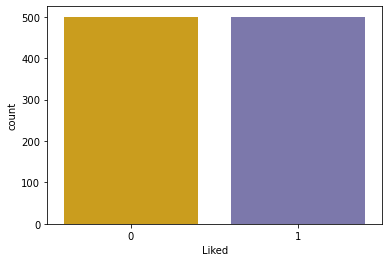

In [20]:
#Checking how many positive and negative reviews are there through seaborn's countplot
sns.countplot(x='Liked',data=reviews, palette='Dark2_r')

In [21]:
reviews.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [22]:
#checking how the data is as per the sentiment
reviews.groupby('Liked').describe().transpose()

Liked                               0                   1
Review count                      500                 500
       unique                     497                 499
       top     The food was terrible.  I love this place.
       freq                         2                   2

# Text Pre-Processing

In [23]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [30]:
corpus = []

for i in range(0,len(reviews)):
    review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=reviews['Review'][i])
    review = review.lower()
    review_words = review.split()
    
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    review = [ps.stem(word) for word in review_words]
    review = ' '.join(review)
    corpus.append(review)

# Vectorizing the Text

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
cv = CountVectorizer()

In [65]:
X = cv.fit_transform(corpus).toarray()
y = reviews.iloc[:,1].values

# Model Building

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [68]:
from sklearn.naive_bayes import MultinomialNB

In [69]:
model = MultinomialNB()

In [70]:
model.fit(X_train,y_train)

MultinomialNB()

In [71]:
preds = model.predict(X_test)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix

In [73]:
confusion_matrix(y_test,preds)

array([[101,  49],
       [ 26, 124]], dtype=int64)

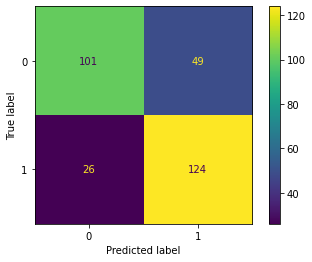

In [74]:
plot_confusion_matrix(model,X_test,y_test)

# Saving the Model

In [75]:
import pickle

In [76]:
pickle.dump(cv, open('vectorize-text.pkl', 'wb'))

In [77]:
new_file = 'sentiment-analysis-model.pkl'
pickle.dump(model, open(new_file, 'wb'))